# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date       
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | vorgashor
Processing Record 5 of Set 1 | keflavik
Processing Record 6 of Set 1 | vilyuchinsk
Processing Record 7 of Set 1 | nikolayevsk-on-amure
Processing Record 8 of Set 1 | nemuro
Processing Record 9 of Set 1 | kendari
Processing Record 10 of Set 1 | jumla
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | pisco
Processing Record 15 of Set 1 | khandyga
Processing Record 16 of Set 1 | uturoa
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | mujiayingzi
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | qa'en
Processing Record 22 of Set 1 | con

Processing Record 37 of Set 4 | al bardiyah
Processing Record 38 of Set 4 | ceeldheer
Processing Record 39 of Set 4 | spasskoye
Processing Record 40 of Set 4 | swakopmund
Processing Record 41 of Set 4 | formosa do rio preto
Processing Record 42 of Set 4 | raseiniai
Processing Record 43 of Set 4 | bacabal
Processing Record 44 of Set 4 | hengchun
Processing Record 45 of Set 4 | nogliki
Processing Record 46 of Set 4 | prejmer
Processing Record 47 of Set 4 | tazovsky
Processing Record 48 of Set 4 | atafu village
Processing Record 49 of Set 4 | albertina
Processing Record 0 of Set 5 | alofi
Processing Record 1 of Set 5 | kyren
Processing Record 2 of Set 5 | pibor
City not found. Skipping...
Processing Record 3 of Set 5 | enewetak
Processing Record 4 of Set 5 | thompson
Processing Record 5 of Set 5 | sidi bouzid
Processing Record 6 of Set 5 | port elizabeth
Processing Record 7 of Set 5 | key largo
Processing Record 8 of Set 5 | mahalapye
Processing Record 9 of Set 5 | el calafate
Processing 

Processing Record 28 of Set 8 | kununurra
Processing Record 29 of Set 8 | bomdila
Processing Record 30 of Set 8 | santa lucia
Processing Record 31 of Set 8 | colonia
Processing Record 32 of Set 8 | kuqa
Processing Record 33 of Set 8 | piracuruca
Processing Record 34 of Set 8 | arraial do cabo
Processing Record 35 of Set 8 | westport
Processing Record 36 of Set 8 | ocean pines
Processing Record 37 of Set 8 | puerto rico
Processing Record 38 of Set 8 | brokopondo
Processing Record 39 of Set 8 | truro
Processing Record 40 of Set 8 | fortuna foothills
Processing Record 41 of Set 8 | juchipila
Processing Record 42 of Set 8 | port saint john's
Processing Record 43 of Set 8 | charlottetown
Processing Record 44 of Set 8 | roxas city
Processing Record 45 of Set 8 | unai
Processing Record 46 of Set 8 | piacabucu
Processing Record 47 of Set 8 | chifeng
Processing Record 48 of Set 8 | isle of lewis
City not found. Skipping...
Processing Record 49 of Set 8 | yatou
Processing Record 0 of Set 9 | akt

Processing Record 16 of Set 12 | sinabang
Processing Record 17 of Set 12 | byron bay
Processing Record 18 of Set 12 | kinablangan
Processing Record 19 of Set 12 | guerrero negro
Processing Record 20 of Set 12 | strezhevoy
Processing Record 21 of Set 12 | yorosso
Processing Record 22 of Set 12 | am timan
Processing Record 23 of Set 12 | phan thiet
Processing Record 24 of Set 12 | pucon
Processing Record 25 of Set 12 | brisas de zicatela
Processing Record 26 of Set 12 | damavand
Processing Record 27 of Set 12 | oyonnax
Processing Record 28 of Set 12 | briviesca
Processing Record 29 of Set 12 | big bend
Processing Record 30 of Set 12 | bekasi
Processing Record 31 of Set 12 | cootamundra
Processing Record 32 of Set 12 | strathmore
Processing Record 33 of Set 12 | kot isa khan
Processing Record 34 of Set 12 | berdigestyakh
Processing Record 35 of Set 12 | cairns city
City not found. Skipping...
Processing Record 36 of Set 12 | bokovskaya
Processing Record 37 of Set 12 | padang
Processing Re

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,-0.90,98,100,3.97,RU,1695838505
1,puerto natales,-51.7236,-72.4875,3.25,81,75,2.06,CL,1695838505
2,bethel,41.3712,-73.4140,20.47,57,0,3.60,US,1695838506
3,vorgashor,67.5833,63.9500,-0.36,90,92,2.79,RU,1695838506
4,keflavik,64.0049,-22.5624,12.24,82,75,6.17,IS,1695838507


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-0.90,98,100,3.97,RU,1695838505
1,puerto natales,-51.7236,-72.4875,3.25,81,75,2.06,CL,1695838505
2,bethel,41.3712,-73.4140,20.47,57,0,3.60,US,1695838506
3,vorgashor,67.5833,63.9500,-0.36,90,92,2.79,RU,1695838506
4,keflavik,64.0049,-22.5624,12.24,82,75,6.17,IS,1695838507


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

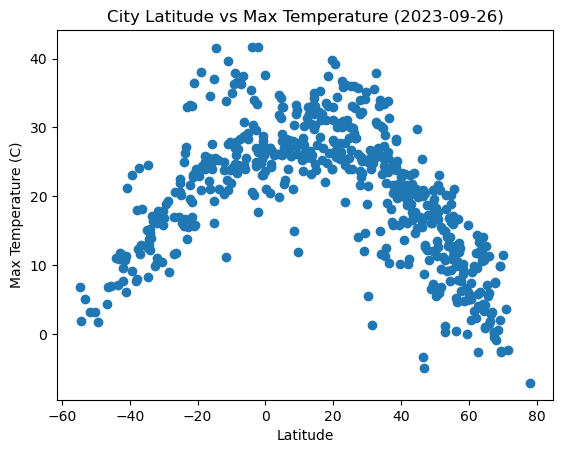

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (2023-09-26)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

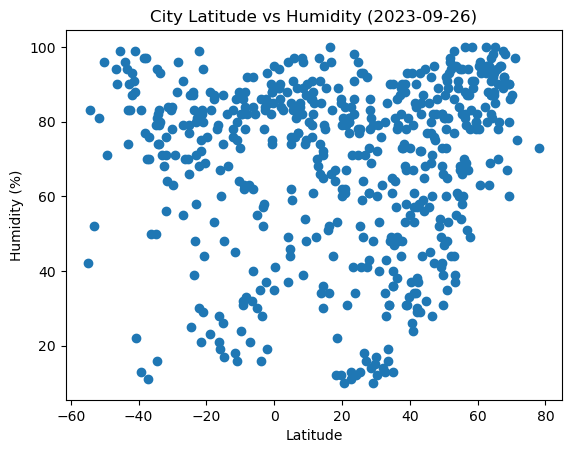

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (2023-09-26)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

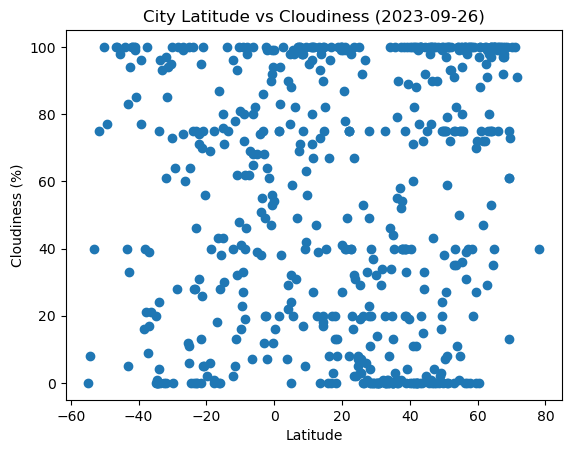

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (2023-09-26)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

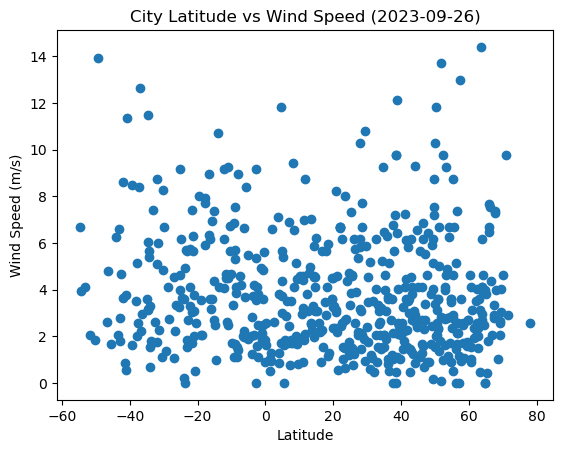

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (2023-09-26)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
# basic formula as follows: 
    #(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
    #regress_values = x_axis * slope + intercept
    #plt.scatter(x_axis, y_axis)
    #plt.plot(x_axis, regress_values, color="red")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-0.90,98,100,3.97,RU,1695838505
2,bethel,41.3712,-73.4140,20.47,57,0,3.60,US,1695838506
3,vorgashor,67.5833,63.9500,-0.36,90,92,2.79,RU,1695838506
4,keflavik,64.0049,-22.5624,12.24,82,75,6.17,IS,1695838507
5,vilyuchinsk,52.9306,158.4028,1.15,77,35,2.74,RU,1695838340


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,3.25,81,75,2.06,CL,1695838505
8,kendari,-3.9450,122.4989,20.65,86,51,1.22,ID,1695838508
10,margaret river,-33.9500,115.0667,15.27,83,24,3.28,AU,1695838508
11,puerto ayora,-0.7393,-90.3518,27.98,88,92,3.58,EC,1695838509
12,grytviken,-54.2811,-36.5092,1.83,83,8,3.96,GS,1695838509


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.787031982749752
---------------------------------
Observations:
There is a negative relationship between temperature and latitude. As latitude increases (moving away from equator), the temperature decreases.


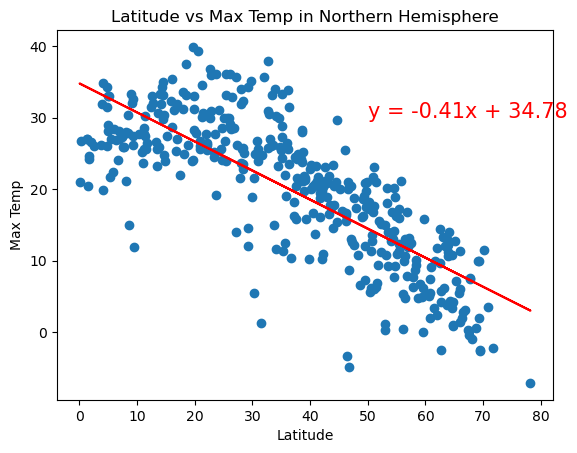

<Figure size 640x480 with 0 Axes>

In [35]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")
plt.annotate(line_eq,xy=(50,30),xytext=(50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp in Northern Hemisphere")

print(f"The r-value is: {rvalue}")
print("---------------------------------")
print("Observations:")
print("There is a negative relationship between temperature and latitude. As latitude increases (moving away from equator), the temperature decreases.")
plt.show()
#Save the figure
plt.savefig("output_data/Fig5-Northern-Temp.png")

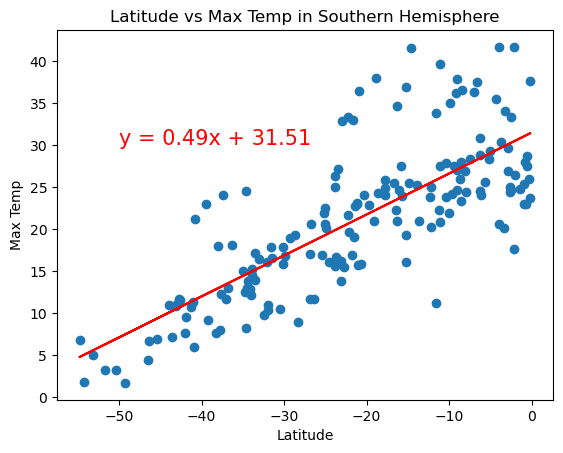

The r-value is: 0.776696714950318
---------------------------------
Observations:
There is a positive relationship between temperature and latitude. As latitude increases (moving toward the equator), the temperature increases.


<Figure size 640x480 with 0 Axes>

In [36]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")
plt.annotate(line_eq,xy=(-50,30),xytext=(-50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp in Southern Hemisphere")
plt.show()
print(f"The r-value is: {rvalue}")
print("---------------------------------")
print("Observations:")
print("There is a positive relationship between temperature and latitude. As latitude increases (moving toward the equator), the temperature increases.")
plt.show()

#Save the figure
plt.savefig("output_data/Fig6-Southern-Temp.png")

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.17303235880744383
---------------------------------
Observations:
There is a slightly positive relationship between humidity and latitude.


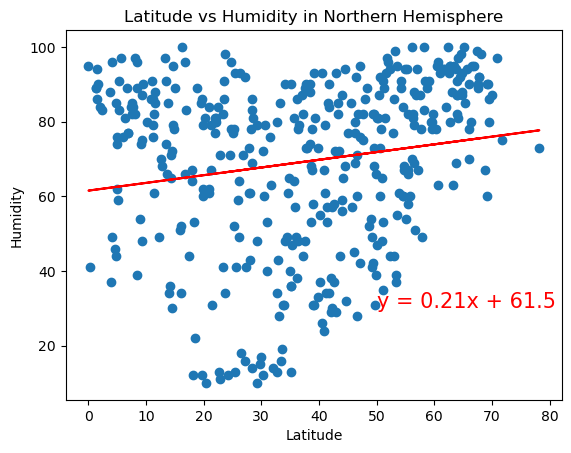

<Figure size 640x480 with 0 Axes>

In [37]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")
plt.annotate(line_eq,xy=(50,30),xytext=(50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity in Northern Hemisphere")

print(f"The r-value is: {rvalue}")
print("---------------------------------")
print("Observations:")
print("There is a slightly positive relationship between humidity and latitude.")
plt.show()
#Save the figure
plt.savefig("output_data/Fig7-Northern-Humidity.png")

The r-value is: -0.19084745868882116
---------------------------------
Observations:
There is a slightly negative relationship between humidity and latitude.


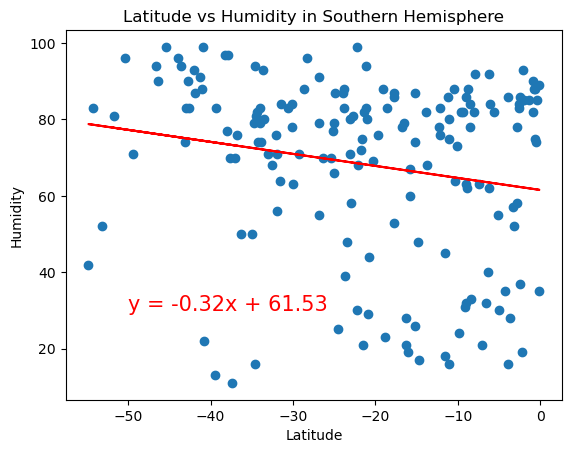

<Figure size 640x480 with 0 Axes>

In [38]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")
plt.annotate(line_eq,xy=(-50,30),xytext=(-50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity in Southern Hemisphere")

print(f"The r-value is: {rvalue}")
print("---------------------------------")
print("Observations:")
print("There is a slightly negative relationship between humidity and latitude.")
plt.show()
#Save the figure
plt.savefig("output_data/Fig8-Southern-Humidity.png")

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1610490740411068
---------------------------------
Observations:
There is no correlation between latitude and cloudiness.


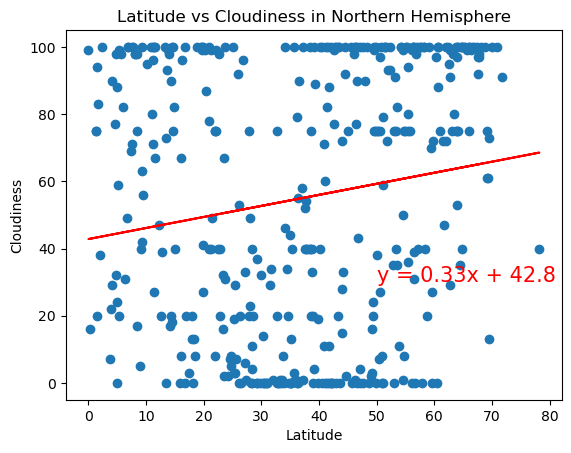

<Figure size 640x480 with 0 Axes>

In [39]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")
plt.annotate(line_eq,xy=(50,30),xytext=(50,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness in Northern Hemisphere")

print(f"The r-value is: {rvalue}")
print("---------------------------------")
print("Observations:")
print("There is no correlation between latitude and cloudiness.")
plt.show()
#Save the figure
plt.savefig("output_data/Fig9-Northern-Cloudiness.png")

The r-value is: 0.017425061033732682
---------------------------------
Observations:
There is no correlation between latitude and cloudiness.


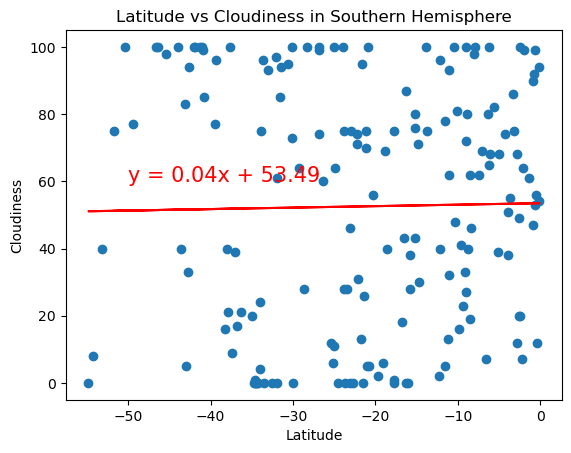

<Figure size 640x480 with 0 Axes>

In [40]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")
plt.annotate(line_eq,xy=(-50,60),xytext=(-50,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness in Southern Hemisphere")

print(f"The r-value is: {rvalue}")
print("---------------------------------")
print("Observations:")
print("There is no correlation between latitude and cloudiness.")
plt.show()
#Save the figure
plt.savefig("output_data/Fig10-Southern-Cloudiness.png")

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.02661186036708219
---------------------------------
Observations:
There is no correlation between latitude and wind speed.


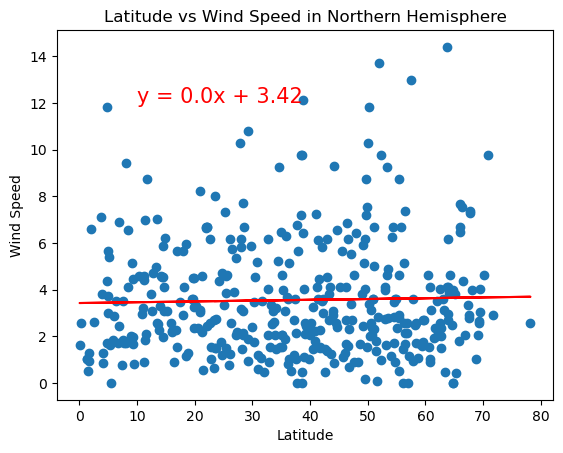

<Figure size 640x480 with 0 Axes>

In [43]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")
plt.annotate(line_eq,xy=(10,12),xytext=(10,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed in Northern Hemisphere")

print(f"The r-value is: {rvalue}")
print("---------------------------------")
print("Observations:")
print("There is no correlation between latitude and wind speed.")
plt.show()
#Save the figure
plt.savefig("output_data/Fig11-Northern-WindSpeed.png")

The r-value is: -0.10302671770470363
---------------------------------
Observations:
There is no correlation between latitude and wind speed.


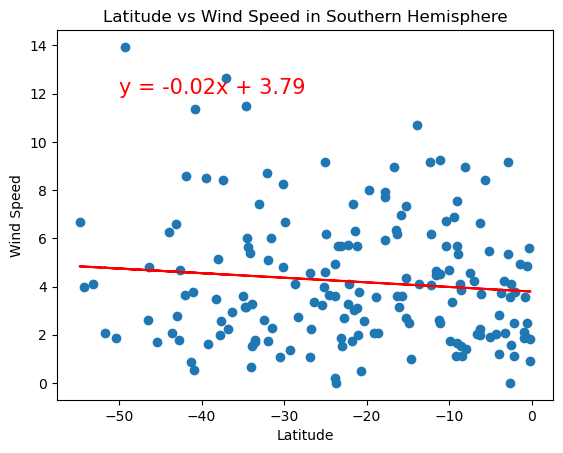

<Figure size 640x480 with 0 Axes>

In [42]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")
plt.annotate(line_eq,xy=(-50,12),xytext=(-50,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed in Southern Hemisphere")

print(f"The r-value is: {rvalue}")
print("---------------------------------")
print("Observations:")
print("There is no correlation between latitude and wind speed.")
plt.show()
#Save the figure
plt.savefig("output_data/Fig12-Southern-WindSpeed.png")